In [1]:
from dataclasses import dataclass
from math import pi

class BipolarCircuit(object):
    def __add__(self, other):
        return Serial(self, other)
    
    def __or__(self, other):
        return Parallel(self, other)
        
class Combination(BipolarCircuit):
    def __init__(self, *args):
        self.args = self.simplify_args(args)
    
    def simplify_args(self, args):
        new_args = ()
        for item in args:
            if isinstance(item, self.__class__):
                new_args = new_args + item.args
            else: 
                new_args = new_args + (item,)
        return new_args
        
    def __repr__(self):
        args_str = ', '.join([repr(item) for item in self.args])
        return f'{self.__class__.__name__}({args_str})'

class Serial(Combination):
    def impedance(self, frequency):
        return sum([item.impedance(frequency) for item in self.args])

class Parallel(Combination):
    def impedance(self, frequency):
        return 1/sum([1/item.impedance(frequency) for item in self.args])

class Device(BipolarCircuit):
    def __init__(self, value):
        self.value = value
        
    def __repr__(self):
        return f"{self.__class__.__name__}({self.value})"


class Resistor(Device):
    def impedance(self, frequency):
        return self.value
    
class Capacitor(Device):
    def impedance(self, frequency):
        return 1/(1J*self.value*2*pi*frequency)

class Inductor(Device):
    def impedance(self, frequency):
        return 1J*self.value*2*pi*frequency


In [2]:
R1 = Resistor(10)
R2 = Resistor(5)
L1 = Inductor(15E-6)
C1 = Capacitor(10E-6)

In [3]:
Serial(Parallel(L1, R1, C1), R2)

Serial(Parallel(Inductor(1.5e-05), Resistor(10), Capacitor(1e-05)), Resistor(5))

In [6]:
circuit = (L1|R1|C1) + R2
circuit

Serial(Parallel(Inductor(1.5e-05), Resistor(10), Capacitor(1e-05)), Resistor(5))

Text(0, 0.5, 'phase [rad]')

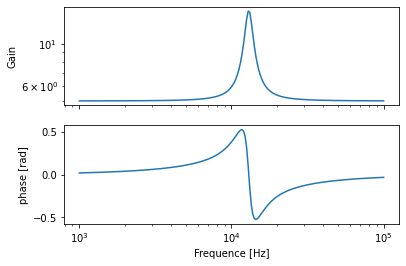

In [9]:
import numpy as np
from matplotlib.pyplot import figure

Tfreq = np.logspace(3, 5, 201)
Z = circuit.impedance(Tfreq)

fig = figure()
ax1, ax2 = fig.subplots(2, 1, sharex=True)

ax1.loglog(Tfreq, np.abs(Z))
ax2.semilogx(Tfreq, np.angle(Z))

ax2.set_xlabel('Frequence [Hz]')
ax1.set_ylabel('Gain')
ax2.set_ylabel('phase [rad]')

In [12]:
R.__class__

__main__.Resistor